In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [2]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [3]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [5]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [9]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [10]:
# 8. MLP + ReLU + ADAM + batchNormalization+ Dropout

model_relu_ADAM_BN_drop = Sequential()

model_relu_ADAM_BN_drop.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_ADAM_BN_drop.add(BatchNormalization())
model_relu_ADAM_BN_drop.add(Dropout(0.3))

model_relu_ADAM_BN_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_ADAM_BN_drop.add(BatchNormalization())
model_relu_ADAM_BN_drop.add(Dropout(0.3))

model_relu_ADAM_BN_drop.add(Dense(output_dim, activation='softmax'))

print(model_relu_ADAM_BN_drop.summary())

model_relu_ADAM_BN_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_ADAM_BN_drop.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

Epoch 46/500
87554/87554 [==============================] - 4s 48us/step - loss: 0.0942 - accuracy: 0.9725 - val_loss: 0.0845 - val_accuracy: 0.9761
Epoch 47/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0955 - accuracy: 0.9724 - val_loss: 0.0847 - val_accuracy: 0.9760
Epoch 48/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0952 - accuracy: 0.9727 - val_loss: 0.0856 - val_accuracy: 0.9760
Epoch 49/500
87554/87554 [==============================] - 4s 40us/step - loss: 0.1018 - accuracy: 0.9710 - val_loss: 0.0894 - val_accuracy: 0.9743
Epoch 50/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0954 - accuracy: 0.9722 - val_loss: 0.0855 - val_accuracy: 0.9762
Epoch 51/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0958 - accuracy: 0.9728 - val_loss: 0.0853 - val_accuracy: 0.9762
Epoch 52/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0921 - accuracy: 0.9731

87554/87554 [==============================] - 5s 52us/step - loss: 0.0828 - accuracy: 0.9760 - val_loss: 0.0765 - val_accuracy: 0.9790
Epoch 101/500
87554/87554 [==============================] - 4s 51us/step - loss: 0.0797 - accuracy: 0.9764 - val_loss: 0.0794 - val_accuracy: 0.9788
Epoch 102/500
87554/87554 [==============================] - 5s 55us/step - loss: 0.0804 - accuracy: 0.9762 - val_loss: 0.0795 - val_accuracy: 0.9778
Epoch 103/500
87554/87554 [==============================] - 4s 50us/step - loss: 0.0779 - accuracy: 0.9772 - val_loss: 0.0758 - val_accuracy: 0.9790
Epoch 104/500
87554/87554 [==============================] - 4s 49us/step - loss: 0.0769 - accuracy: 0.9772 - val_loss: 0.0769 - val_accuracy: 0.9791
Epoch 105/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0785 - accuracy: 0.9772 - val_loss: 0.0763 - val_accuracy: 0.9792
Epoch 106/500
87554/87554 [==============================] - 4s 48us/step - loss: 0.0780 - accuracy: 0.9776 - val_

87554/87554 [==============================] - 3s 39us/step - loss: 0.0690 - accuracy: 0.9797 - val_loss: 0.0746 - val_accuracy: 0.9803
Epoch 155/500
87554/87554 [==============================] - 3s 40us/step - loss: 0.0654 - accuracy: 0.9806 - val_loss: 0.0730 - val_accuracy: 0.9805
Epoch 156/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.0749 - val_accuracy: 0.9803
Epoch 157/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0695 - accuracy: 0.9795 - val_loss: 0.0738 - val_accuracy: 0.9806
Epoch 158/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0655 - accuracy: 0.9805 - val_loss: 0.0720 - val_accuracy: 0.9810
Epoch 159/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0759 - val_accuracy: 0.9796
Epoch 160/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0677 - accuracy: 0.9796 - val_

87554/87554 [==============================] - 4s 41us/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0747 - val_accuracy: 0.9805
Epoch 209/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0748 - val_accuracy: 0.9805
Epoch 210/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0621 - accuracy: 0.9816 - val_loss: 0.0740 - val_accuracy: 0.9812
Epoch 211/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0735 - val_accuracy: 0.9804
Epoch 212/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0757 - val_accuracy: 0.9806
Epoch 213/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.0726 - val_accuracy: 0.9817
Epoch 214/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0600 - accuracy: 0.9819 - val_

Epoch 263/500
87554/87554 [==============================] - 4s 50us/step - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0722 - val_accuracy: 0.9816
Epoch 264/500
87554/87554 [==============================] - 5s 53us/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0719 - val_accuracy: 0.9815
Epoch 265/500
87554/87554 [==============================] - 4s 50us/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0717 - val_accuracy: 0.9812
Epoch 266/500
87554/87554 [==============================] - 4s 50us/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0715 - val_accuracy: 0.9818
Epoch 267/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0715 - val_accuracy: 0.9819
Epoch 268/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.0712 - val_accuracy: 0.9820
Epoch 269/500
87554/87554 [==============================] - 4s 50us/step - loss: 0.0530 - accuracy:

87554/87554 [==============================] - 4s 46us/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0733 - val_accuracy: 0.9819
Epoch 318/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0540 - accuracy: 0.9838 - val_loss: 0.0745 - val_accuracy: 0.9818
Epoch 319/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0518 - accuracy: 0.9842 - val_loss: 0.0707 - val_accuracy: 0.9826
Epoch 320/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0720 - val_accuracy: 0.9815
Epoch 321/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0724 - val_accuracy: 0.9819
Epoch 322/500
87554/87554 [==============================] - 4s 46us/step - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.0718 - val_accuracy: 0.9821
Epoch 323/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0506 - accuracy: 0.9844 - val_

87554/87554 [==============================] - 3s 35us/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0728 - val_accuracy: 0.9816
Epoch 372/500
87554/87554 [==============================] - 3s 30us/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0729 - val_accuracy: 0.9824
Epoch 373/500
87554/87554 [==============================] - 3s 33us/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0723 - val_accuracy: 0.9822
Epoch 374/500
87554/87554 [==============================] - 3s 31us/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0707 - val_accuracy: 0.9822
Epoch 375/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0743 - val_accuracy: 0.9820
Epoch 376/500
87554/87554 [==============================] - 3s 33us/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.0734 - val_accuracy: 0.9814
Epoch 377/500
87554/87554 [==============================] - 3s 30us/step - loss: 0.0506 - accuracy: 0.9844 - val_

Epoch 426/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0734 - val_accuracy: 0.9829
Epoch 427/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0728 - val_accuracy: 0.9827
Epoch 428/500
87554/87554 [==============================] - 3s 33us/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0721 - val_accuracy: 0.9827
Epoch 429/500
87554/87554 [==============================] - 3s 30us/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0695 - val_accuracy: 0.9821
Epoch 430/500
87554/87554 [==============================] - 2s 29us/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0727 - val_accuracy: 0.9822
Epoch 431/500
87554/87554 [==============================] - 3s 30us/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0751 - val_accuracy: 0.9822
Epoch 432/500
87554/87554 [==============================] - 3s 29us/step - loss: 0.0446 - accuracy:

87554/87554 [==============================] - 2s 19us/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0759 - val_accuracy: 0.9826
Epoch 481/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0731 - val_accuracy: 0.9827
Epoch 482/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0762 - val_accuracy: 0.9823
Epoch 483/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0755 - val_accuracy: 0.9826
Epoch 484/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0753 - val_accuracy: 0.9821
Epoch 485/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0745 - val_accuracy: 0.9825
Epoch 486/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0460 - accuracy: 0.9854 - val_

In [11]:
y_pred = model_relu_ADAM_BN_drop.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.93      0.70      0.80       556
           2       0.96      0.95      0.96      1448
           3       0.90      0.69      0.78       162
           4       0.99      0.98      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.95      0.86      0.90     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.07293426106871699
Test accuracy: 0.9828248023986816


<IPython.core.display.Javascript object>


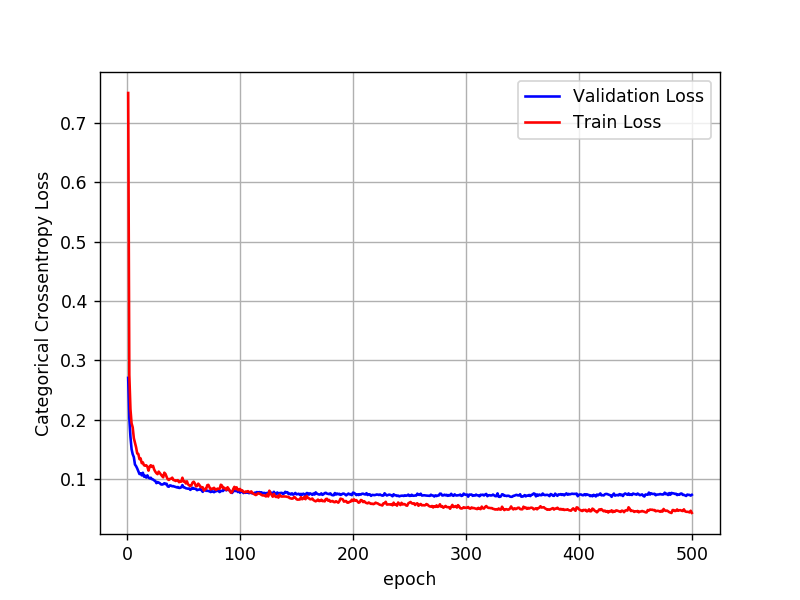

In [12]:
score = model_relu_ADAM_BN_drop.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#              precision    recall  f1-score   support

#           0       0.99      1.00      0.99     18118
#           1       0.93      0.70      0.80       556
#           2       0.96      0.95      0.96      1448
#           3       0.90      0.69      0.78       162
#           4       0.99      0.98      0.99      1608

#    accuracy                           0.98     21892
#   macro avg       0.95      0.86      0.90     21892
# weighted avg       0.98      0.98      0.98     21892

# Test score: 0.07293426106871699
# Test accuracy: 0.9828248023986816